## 1. Exploration et Audit des données (suite) :

### 1.1 Données images (suite) :

Nous allons dans cette partie, afficher les images moyennes de chaque catégorie, et avant cela nous devons faire quelques ajustement. On commence en premier lieu par importer notre Dataset.

In [1]:
#Import
import pandas as pd
import matplotlib.pyplot as plt
#Lecture de nos jeux de données :
data=pd.read_csv('X_train_update.csv',index_col=0)
y=pd.read_csv('Y_train_CVw08PX.csv',index_col=0)

On crée notre colonne image_name.

In [2]:
#Création d'une colonne image_name:
data['image_name'] = data.astype('str').apply(lambda row: 'image_'+row['imageid']+'_product_'+row['productid']+'.jpg',axis = 1)

On prend uniquement 10% de notre Jeu de donnée, car le nombre d'image est beaucoup trop important pour être lu en entier. En effet cela a fait planter notre PC.

In [3]:
#On prend 10% du dataset :
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val =train_test_split(data,y,test_size=0.1,random_state=42)

On réequilibre notre Dataset avec de l'UnderSampling afin d'avoir une image moyenne qui prend le même nombre d'images dans chaque catégorie.

In [4]:
#Rééquilibrage des données :
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_ru, y_ru = rus.fit_resample(X_val , y_val)
y_ru.prdtypecode.value_counts()

1940    69
2585    69
2060    69
40      69
50      69
60      69
2220    69
2280    69
2403    69
2462    69
2522    69
2582    69
2583    69
2705    69
1920    69
2905    69
1140    69
1160    69
1180    69
1280    69
1281    69
1300    69
1301    69
1302    69
1320    69
1560    69
10      69
Name: prdtypecode, dtype: int64

On fusionne nos features et notre variable cible, et on crée une colonne index.

In [5]:
#On joint les features et target :
datasamp=X_ru.join(y_ru)
#On crée un index :
datasamp=datasamp.reset_index()
datasamp

,index,designation,description,productid,imageid,image_name,prdtypecode
0,0,Traité D'électricité - Volume 22 Haute Tension,NaN,2665752834,1254652389,image_1254652389_product_2665752834.jpg,10
1,1,I Maestri Del Colore Mantegna,Arte italiana. Cristo nell'Orto. Pala di San Z...,48355666,749890023,image_749890023_product_48355666.jpg,10
2,2,Faust - Opera En 5 Actes - Chant Et Paroles.,NaN,246071793,964158244,image_964158244_product_246071793.jpg,10
3,3,Readings In Development Economics - Empirical ...,NaN,85741209,998812657,image_998812657_product_85741209.jpg,10
4,4,The New Production Of Users,NaN,1665914215,1232779988,image_1232779988_product_1665914215.jpg,10
...,...,...,...,...,...,...,...
1858,1858,Men Of War: Assault Squad 2 Complete - Jeu En ...,NOTE : Code d&#39;activation à utiliser exclus...,3716248365,1241285462,image_1241285462_product_3716248365.jpg,2905
1859,1859,Space Hulk: Tactics - Jeu En Téléchargement,<div> <p><strong>NOTE :</strong> Un compte Ste...,3488486130,1217026616,image_1217026616_product_3488486130.jpg,2905
1860,1860,Tyranny - Deluxe - Jeu En Téléchargement,<div> <p><strong>NOTE :</strong> Un ...,3716248646,1236944546,image_1236944546_product_3716248646.jpg,2905
1861,1861,Overcooked! 2 - Night Of The Hangry Horde (Ext...,<div> <p><strong>NOTE :</strong> Nécessite le ...,4007367565,1275585940,image_1275585940_product_4007367565.jpg,2905


On crée le chemin d'accès de chaque image à l'aide d'une boucle :

In [6]:
#Création chemin d'accès :
path = "images\images\image_train\\"
img = []
for i in range(len(datasamp)):
    img.append(path + str(datasamp.loc[i,'image_name']))  

In [7]:
img

['images\\images\\image_train\\image_1254652389_product_2665752834.jpg',
 'images\\images\\image_train\\image_749890023_product_48355666.jpg',
 'images\\images\\image_train\\image_964158244_product_246071793.jpg',
 'images\\images\\image_train\\image_998812657_product_85741209.jpg',
 'images\\images\\image_train\\image_1232779988_product_1665914215.jpg',
 'images\\images\\image_train\\image_1295364888_product_4126136716.jpg',
 'images\\images\\image_train\\image_1274731844_product_118175727.jpg',
 'images\\images\\image_train\\image_887219924_product_133262390.jpg',
 'images\\images\\image_train\\image_1299553538_product_4140665464.jpg',
 'images\\images\\image_train\\image_1295394860_product_4126328522.jpg',
 'images\\images\\image_train\\image_1032297913_product_620496382.jpg',
 'images\\images\\image_train\\image_1151985406_product_2596036461.jpg',
 'images\\images\\image_train\\image_1067905332_product_1185501288.jpg',
 'images\\images\\image_train\\image_1298768118_product_4140073

On lit l'ensemble des images à l'aide d'une boucle également :

In [8]:
#Lecture image :
image=[]
for i in img:
    image.append(plt.imread(i))

Et enfin on affiche notre image moyenne de notre première catégorie 10 comme suit :

In [23]:
#On affiche les différents index où apparait la catégorie 10 :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 10])

In [14]:
#On affiche les index :
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68], dtype=int64)

In [16]:
#On transforme nos images en array :
image=np.array(image)
#On affecte à b les images contenant les index récupérés précedemment : 
b=image[a]

In [19]:
#On affiche les dimensions de b :
b.shape

(69, 500, 500, 3)

In [20]:
#On calcule la moyenne des pixels des images :
c=b.sum(axis=0)/len(b)
c=c.astype(int)

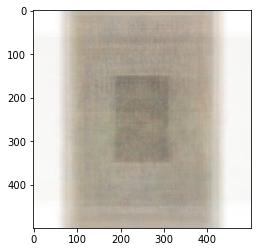

In [22]:
#On affiche l'image moyenne de la catégorie 10 = Livres :
plt.imshow(c)

On voit bien grâce à l'image moyenne, que cette catégorie représente un produit rectangulaire c'est à dire des livres.

On réitère ce processus pour toute nos catégories :

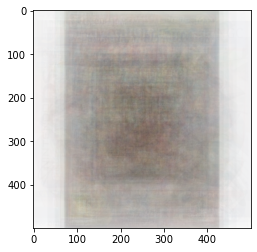

In [24]:
#Calcul de l'image moyenne de la classe 40=Jeux vidéos :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 40])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

Les jeux vidéos ont l'air de produire également une image moyenne rectangulaire.

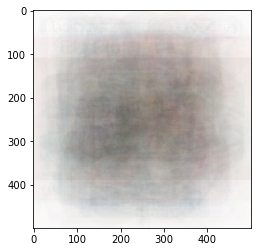

In [25]:
#Calcul de l'image moyenne de la classe 50=Matériel gaming :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 50])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

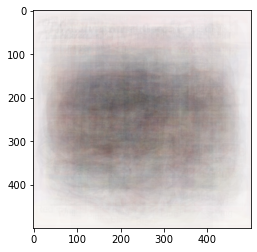

In [26]:
#Calcul de l'image moyenne de la classe 60=Consoles de jeux :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 60])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

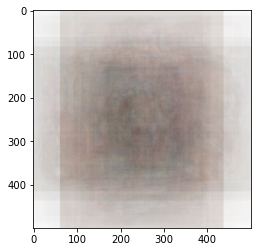

In [27]:
#Calcul de l'image moyenne de la classe 1140=Figurines/accessoires :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 1140])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

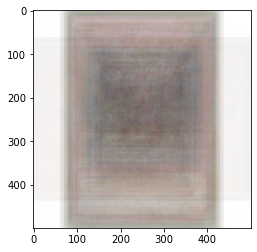

In [28]:
#Calcul de l'image moyenne de la classe 1160=Cartes de collection :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 1160])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

On voit bien ici qu'il s'agit de cartes, bien qu'on puisse confondre avec l'image moyenne des livres.

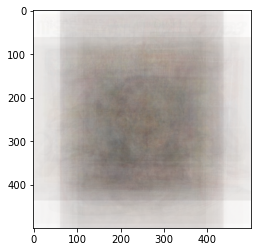

In [29]:
#Calcul de l'image moyenne de la classe 1180=Figurines/accessoire2 :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 1180])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

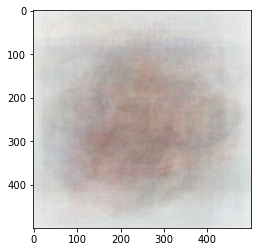

In [30]:
#Calcul de l'image moyenne de la classe 1280=Jouets enfants(peluche,poupées...) :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 1280])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

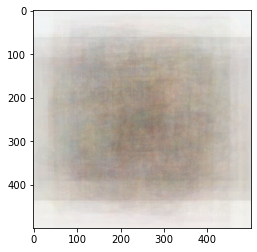

In [31]:
#Calcul de l'image moyenne de la classe 1281=jeux de société :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 1281])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

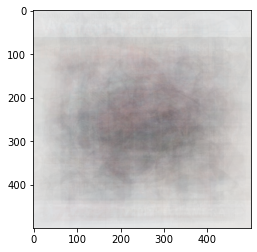

In [9]:
#Calcul de l'image moyenne de la classe 1300=jouets avions/voitures :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 1300])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

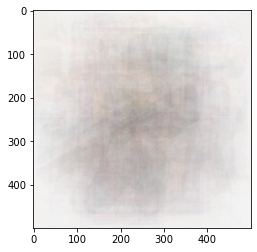

In [10]:
#Calcul de l'image moyenne de la classe 1301=Jeux de société(fléchettes,billard), chaussures bébé:
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 1301])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

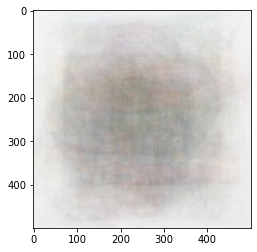

In [11]:
#Calcul de l'image moyenne de la classe 1302 = Figurines/jeux plein air :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 1302])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

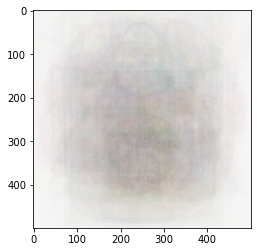

In [12]:
#Calcul de l'image moyenne de la classe 1320= Puériculture : Accessoires bébé/petite enfance(poussettes, jeux, etc.) :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 1320])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

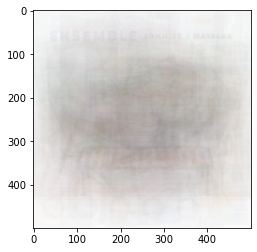

In [13]:
#Calcul de l'image moyenne de la classe 1560 = Meuble et literie Maison :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 1560])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

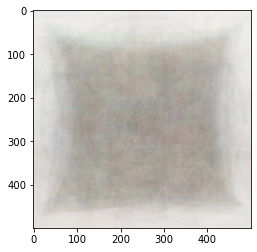

In [14]:
#Calcul de l'image moyenne de la classe 1920 = linge de maison  :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 1920])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

L'image moyenne du linge de maison a l'air de représenter un coussin, ou un oreiller.

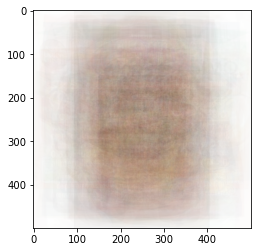

In [15]:
#Calcul de l'image moyenne de la classe 1940 = alimentation :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 1940])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

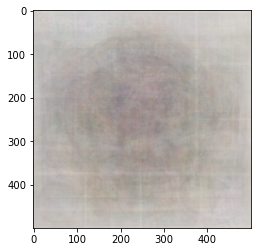

In [16]:
#Calcul de l'image moyenne de la classe 2060 = Décoration :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 2060])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

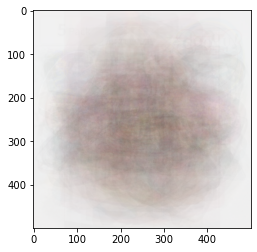

In [17]:
#Calcul de l'image moyenne de la classe 2220 = animalerie :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 2220])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

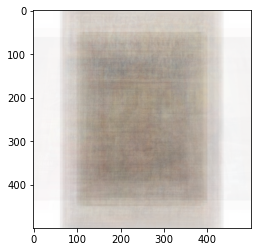

In [18]:
#Calcul de l'image moyenne de la classe 2280 = journal et magazine :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 2280])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

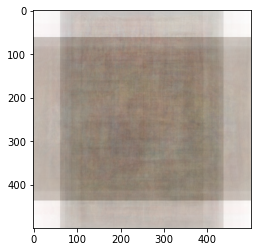

In [19]:
#Calcul de l'image moyenne de la classe 2403  = Livres d'apprentissages (il y a aussi des magazine ..) :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 2403])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

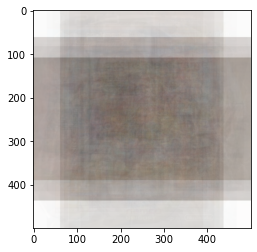

In [20]:
#Calcul de l'image moyenne de la classe 2462 = Consoles et jeux :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 2462])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

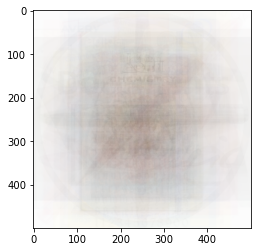

In [21]:
#Calcul de l'image moyenne de la classe 2522 = papeterie :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 2522])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

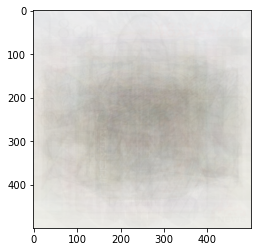

In [22]:
#Calcul de l'image moyenne de la classe 2582 = jardin et piscine :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 2582])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

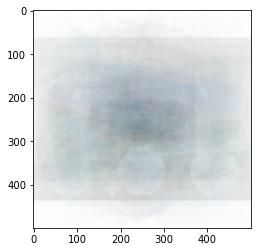

In [23]:
#Calcul de l'image moyenne de la classe 2583 = jardin et piscine 2 :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 2583])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

L'image moyenne ici tend vers le bleu, et nous rappelle bien les piscines.

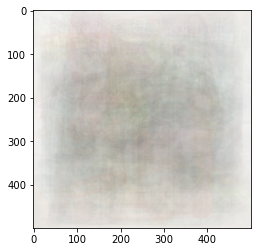

In [24]:
#Calcul de l'image moyenne de la classe 2585 Jardin et piscine : outillage de jardin :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 2585])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

L'image moyenne ici tend vers le vert, et nous rappelle bien le jardin.

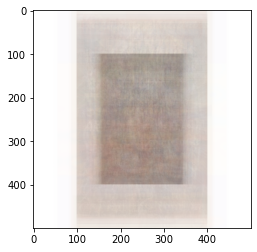

In [25]:
#Calcul de l'image moyenne de la classe 2705 = livres :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 2705])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

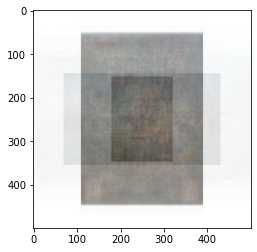

In [26]:
#Calcul de l'image moyenne de la classe 2905 = jeux videos :
import numpy as np
a=np.array(datasamp.index[datasamp.prdtypecode == 2905])
image=np.array(image)
b=image[a]
c=b.sum(axis=0)/len(b)
c=c.astype(int)
plt.imshow(c)

Conclusion :
On constate que les cartes, livres,et jeux vidéos affichent une image moyenne rectangulaire, le linge de maison affiche une image moyenne en forme de coussin, la catégorie piscine affiche une image qui tend vers le bleu, et la catégorie jardin affiche une image qui tend vers le vert. L'image moyenne des autres catégories ne montre rien de particulier.